# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="
   
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{weather_api_key}&q={city}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
'coord'
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | leningradskiy
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | palabuhanratu
'coord'
Processing Record 6 of Set 1 | taolanaro
'coord'
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | caluquembe
Processing Record 9 of Set 1 | boa viagem
Processing Record 10 of Set 1 | beringovskiy
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | tommot
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | neuquen
Processing Record 20 of Set 1 | korla
Processing Record 21 of Set 1 | marv dasht
'coord'
Processing Record 22 of Se

'coord'
Processing Record 44 of Set 4 | venice
Processing Record 45 of Set 4 | kailua
Processing Record 46 of Set 4 | cravo norte
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | morozovsk
Processing Record 49 of Set 4 | fairbanks
Processing Record 0 of Set 5 | norman wells
Processing Record 1 of Set 5 | yaguajay
Processing Record 2 of Set 5 | berasia
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | dhidhdhoo
Processing Record 7 of Set 5 | sachin
Processing Record 8 of Set 5 | bathsheba
Processing Record 9 of Set 5 | salalah
Processing Record 10 of Set 5 | pedro ii
Processing Record 11 of Set 5 | touros
Processing Record 12 of Set 5 | saint-pierre
Processing Record 13 of Set 5 | necochea
Processing Record 14 of Set 5 | rawson
Processing Record 15 of Set 5 | saint-augustin
Processing Record 16 of Set 5 | flin flon
Processing Record 17 of Set 5 | phan thiet
Processing

Processing Record 42 of Set 8 | agadez
Processing Record 43 of Set 8 | herend
Processing Record 44 of Set 8 | louisbourg
'coord'
Processing Record 45 of Set 8 | kaohsiung
Processing Record 46 of Set 8 | aflu
'coord'
Processing Record 47 of Set 8 | sola
Processing Record 48 of Set 8 | mar del plata
Processing Record 49 of Set 8 | yaan
Processing Record 0 of Set 9 | satipo
Processing Record 1 of Set 9 | geraldton
Processing Record 2 of Set 9 | zhangye
Processing Record 3 of Set 9 | longyearbyen
Processing Record 4 of Set 9 | wharton
Processing Record 5 of Set 9 | laguna
Processing Record 6 of Set 9 | ostersund
Processing Record 7 of Set 9 | okato
Processing Record 8 of Set 9 | aguimes
Processing Record 9 of Set 9 | catuday
Processing Record 10 of Set 9 | lata
Processing Record 11 of Set 9 | smirnykh
Processing Record 12 of Set 9 | mahanje
Processing Record 13 of Set 9 | imperia
Processing Record 14 of Set 9 | kalmunai
Processing Record 15 of Set 9 | san jose
Processing Record 16 of Set 9

Processing Record 36 of Set 12 | muravlenko
Processing Record 37 of Set 12 | ponta delgada
Processing Record 38 of Set 12 | mae sai
Processing Record 39 of Set 12 | newport
Processing Record 40 of Set 12 | tiznit
Processing Record 41 of Set 12 | zhanakorgan
Processing Record 42 of Set 12 | villa vazquez
'coord'
Processing Record 43 of Set 12 | linjiang
Processing Record 44 of Set 12 | sharjah
Processing Record 45 of Set 12 | la paz
Processing Record 46 of Set 12 | verkhoyansk
Processing Record 47 of Set 12 | miyazu
Processing Record 48 of Set 12 | kovernino
Processing Record 49 of Set 12 | sierra vista
Processing Record 0 of Set 13 | gao
Processing Record 1 of Set 13 | quesnel
Processing Record 2 of Set 13 | omsukchan
Processing Record 3 of Set 13 | homer
Processing Record 4 of Set 13 | sohag
Processing Record 5 of Set 13 | pokhara
Processing Record 6 of Set 13 | bwanga
Processing Record 7 of Set 13 | mitsamiouli
Processing Record 8 of Set 13 | kazminskoye
'coord'
Processing Record 9 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,7.06,61,75,6.69,CL,1680823395
1,leningradskiy,69.3833,178.4167,-21.95,92,43,1.91,RU,1680823395
2,vaini,-21.2000,-175.2000,28.09,89,40,6.69,TO,1680823396
3,bethel,41.3712,-73.4140,19.93,74,100,4.63,US,1680823400
4,caluquembe,-13.7833,14.6833,16.67,89,100,0.55,AO,1680823401


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,7.06,61,75,6.69,CL,1680823395
1,leningradskiy,69.3833,178.4167,-21.95,92,43,1.91,RU,1680823395
2,vaini,-21.2000,-175.2000,28.09,89,40,6.69,TO,1680823396
3,bethel,41.3712,-73.4140,19.93,74,100,4.63,US,1680823400
4,caluquembe,-13.7833,14.6833,16.67,89,100,0.55,AO,1680823401


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,7.06,61,75,6.69,CL,1680823395
1,leningradskiy,69.3833,178.4167,-21.95,92,43,1.91,RU,1680823395
2,vaini,-21.2000,-175.2000,28.09,89,40,6.69,TO,1680823396
3,bethel,41.3712,-73.4140,19.93,74,100,4.63,US,1680823400
4,caluquembe,-13.7833,14.6833,16.67,89,100,0.55,AO,1680823401


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

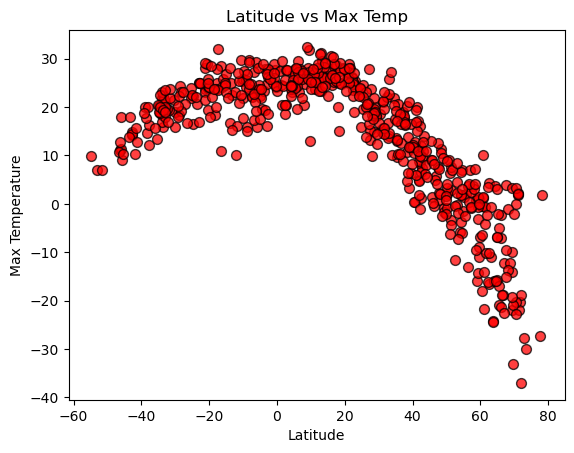

In [8]:
# Build scatter plot for latitude vs. temperature
y_value= city_data_df['Max Temp']
x_value = city_data_df['Lat']

#Plot scatter for values
plt.scatter(x_value,y_value, s=50, c='red', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Incorporate the other graph properties
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [9]:
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.28x +19.35


The r-value is: 0.47158411959205


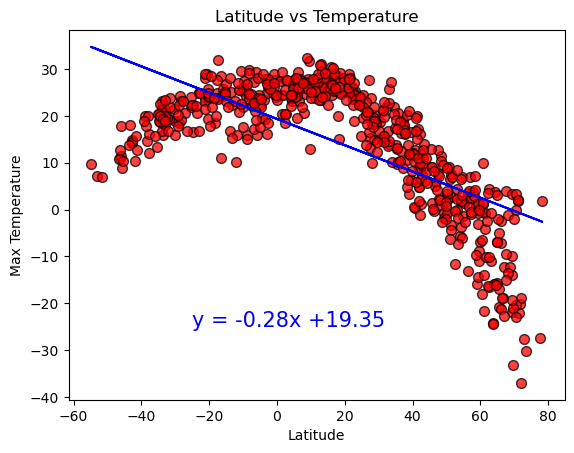

In [10]:
# Create Plot
plt.scatter(x_value,y_value,s=50, c='red', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(x_value,regress_values,"b-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs Temperature')
x_pos, y_pos =-25,-25
plt.annotate(line_eq,(20,15),(x_pos,y_pos),fontsize=15,color="blue")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#### Latitude Vs. Humidity

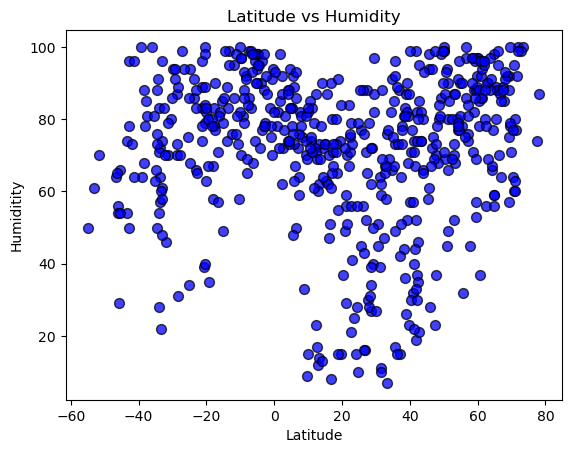

In [11]:
# Build the scatter plots for latitude vs. humidity
Y_value = city_data_df['Humidity']
X_value= city_data_df['Lat']

plt.scatter(X_value,Y_value,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Incorporate the other graph properties
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humiditity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [45]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(X_value, Y_value)

# Get regression values
regress_values = X_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +71.87


The r-value is: 0.0002743129964930827


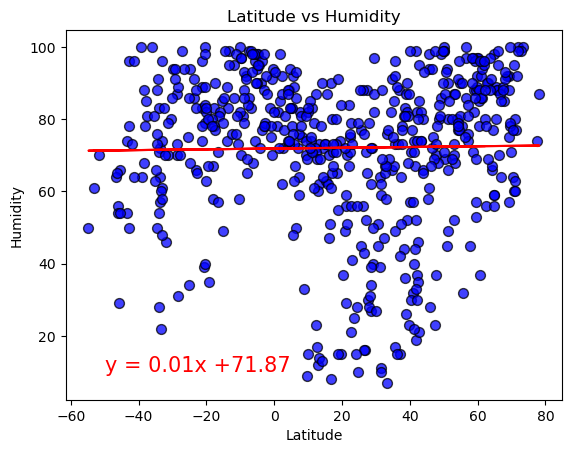

In [46]:
#annotate line of regression onto scatter plot
plt.scatter(X_value,Y_value,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)
plt.plot(X_value,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity")

plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

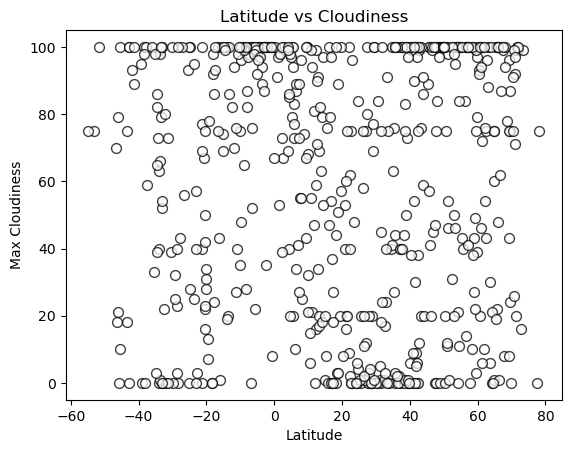

In [14]:
# Build the scatter plots for latitude vs. cloudiness
Y_cloudiness= city_data_df['Cloudiness']

plt.scatter(X_value,Y_cloudiness,s=50, c='white', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Max Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [47]:
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(X_value, Y_cloudiness)

# Get regression values
regress_values = X_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.02x +58.46


The r-value is: 0.0001908731249802735


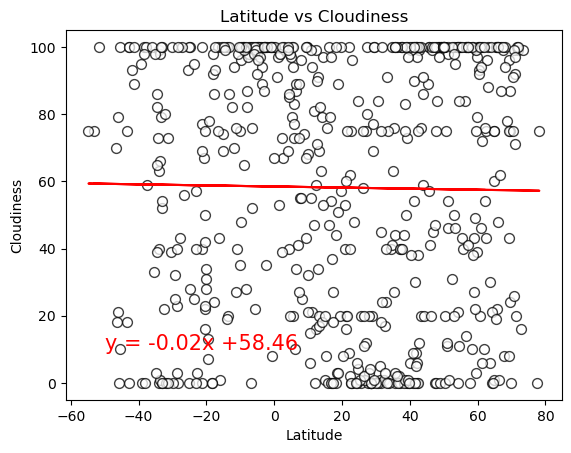

In [50]:
#Calculate trend line 
plt.scatter(X_value,Y_cloudiness,s=50, c='white', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Max Cloudiness')

plt.plot(X_value,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness")


plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

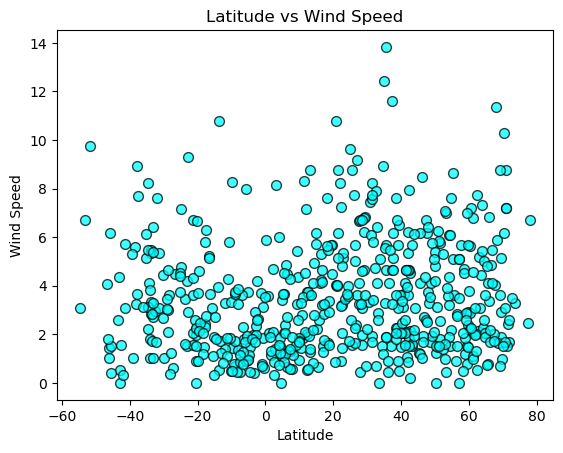

In [51]:
# Build the scatter plots for latitude vs. wind speed
Y_wind= city_data_df['Wind Speed']

plt.scatter(X_value,Y_wind,s=50, c='cyan', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [52]:
# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(X_value, Y_wind)

# Get regression values
regress_values = X_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +3.29


The r-value is: 0.011130942537861482


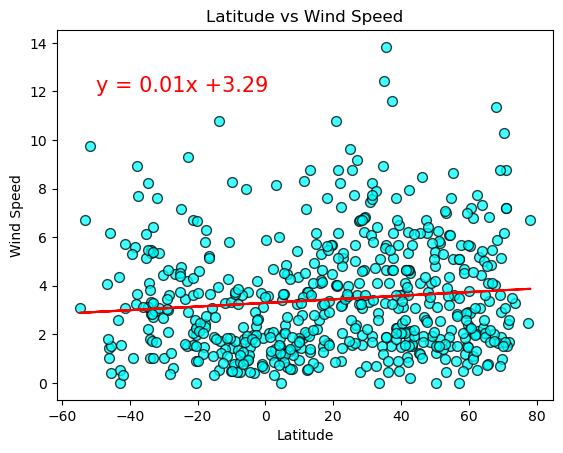

In [40]:
#Calculate trend line 
plt.scatter(X_value, Y_wind,s=50, c='cyan', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.plot(X_value,regress_values,"r-")


plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
#as above for each model 

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,leningradskiy,69.3833,178.4167,-21.95,92,43,1.91,RU,1680823395
3,bethel,41.3712,-73.4140,19.93,74,100,4.63,US,1680823400
6,beringovskiy,63.0500,179.3167,-11.06,90,100,5.17,RU,1680823403
7,cabo san lucas,22.8909,-109.9124,25.34,41,0,5.14,MX,1680823404
8,albany,42.6001,-73.9662,11.95,85,99,4.52,US,1680823405


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,7.06,61,75,6.69,CL,1680823395
2,vaini,-21.2000,-175.2000,28.09,89,40,6.69,TO,1680823396
4,caluquembe,-13.7833,14.6833,16.67,89,100,0.55,AO,1680823401
5,boa viagem,-5.1275,-39.7322,22.26,94,98,1.00,BR,1680823402
13,codrington,-38.2667,141.9667,14.68,88,100,3.26,AU,1680823409


###  Temperature vs. Latitude Linear Regression Plot

y = -0.64x +34.53


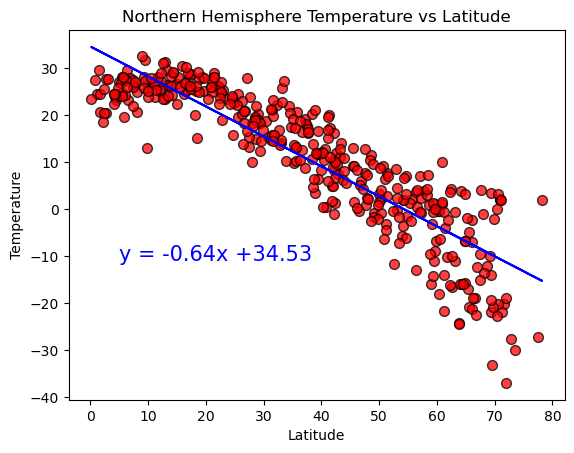

In [93]:
# Linear regression on Northern Hemisphere
# Build the scatter plots for temperature vs latitude 
X_lat= northern_hemi_df['Lat']
y_temp= northern_hemi_df['Max Temp']

#Calculate linear regression
plt.scatter(X_lat, y_temp,s=50, c='red', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Perform a linear regression on Northern hemisphere Latitude vs temperature 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(X_lat, y_temp)

# Get regression values
regress_values = X_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.plot(X_lat,regress_values,"b-")

x_pos, y_pos =5,-11
plt.annotate(line_eq,(20,15),(x_pos,y_pos),fontsize=15,color="blue")

# Incorporate the other graph properties
plt.title('Northern Hemisphere Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Show plot
plt.show()

y = 0.23x +26.17


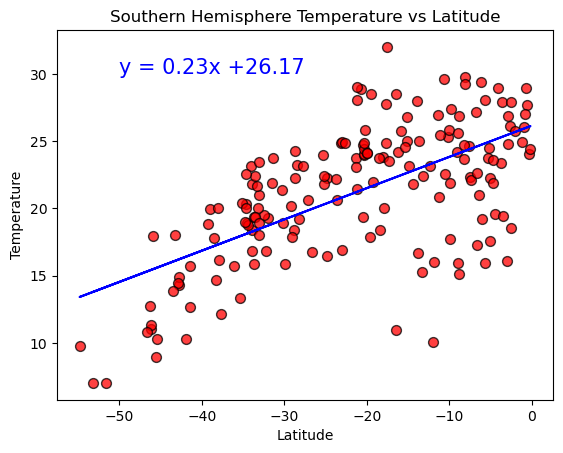

In [94]:
# Linear regression on Southern Hemisphere
x_sh_lat= southern_hemi_df['Lat']
Y_sh_temp= southern_hemi_df['Max Temp']

#Calculate linear regression

plt.scatter(x_sh_lat, Y_sh_temp,s=50, c='red', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Perform a linear regression on Southern hemisphere Latitude vs temperature 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_sh_lat,Y_sh_temp)

# Get regression values
regress_values = x_sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.plot(x_sh_lat,regress_values,"b-")

plt.annotate(line_eq,(-50,30),fontsize=15,color="blue")

# Incorporate the other graph properties
plt.title('Southern Hemisphere Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Show plot
plt.show()

**Discussion about the linear relationship:
The northern hemisphere indicates a negative correlation between temperuature and latitude indicating that temperature is
likely to decrease, the higher the point of latitude. However, this is the opposite for the southern hemisphere which indicates
the temperature is likely to rise when the latitude approaches 0. This makes rational sense since approaching 0 degrees is 
at the equator, known to be warmer. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.28x +59.34


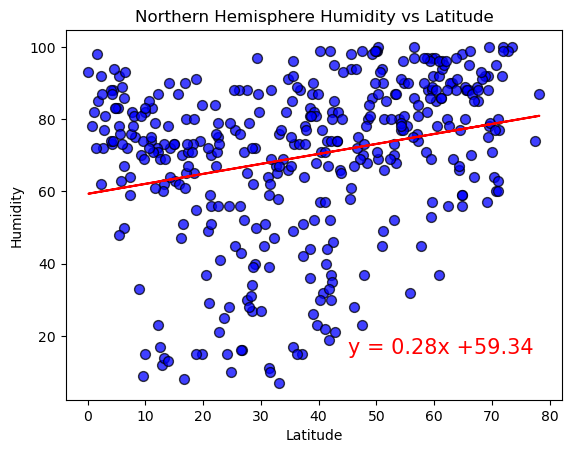

In [91]:
# Build the scatter plots for humidity vs latitude in northern hemisphere 
x_nh_lat= northern_hemi_df['Lat']
y_nh_humi= northern_hemi_df['Humidity']

#Calculate linear regression
plt.scatter(x_nh_lat, y_nh_humi,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Perform a linear regression on Northern hemisphere Latitude vs humidity 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_nh_lat, y_nh_humi)

# Get regression values
regress_values = x_nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.plot(x_nh_lat,regress_values,"r-")

plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

y = 0.51x +88.52


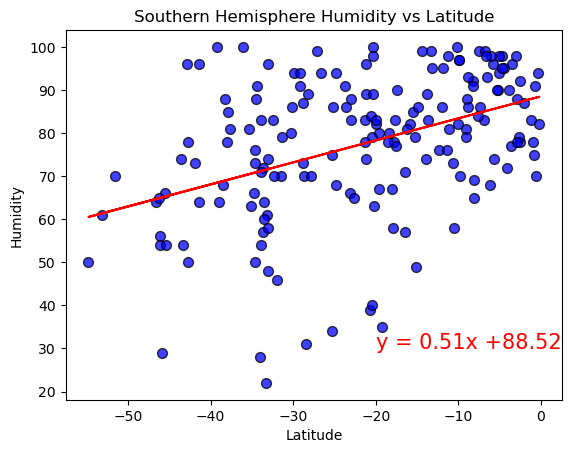

In [89]:
# Southern Hemisphere
# Build the scatter plots for humidity vs latitude in southern hemisphere 
sh_lat= southern_hemi_df['Lat']
sh_humi= southern_hemi_df['Humidity']

#Calculate linear regression
plt.scatter(sh_lat, sh_humi,s=50, c='blue', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Perform a linear regression on Northern hemisphere Latitude vs humidity 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sh_lat,sh_humi)

# Get regression values
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(sh_lat,regress_values,"r-")
print(line_eq)

#line annotation 
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title('Southern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** 

There is a positive correlation between humidity and latitude in both hemispheres. Both graphs show that the humidity increases,
the greater the latitude is. Therefore humidity is likely to be lowest at the lowest poinst of latitude and highest at the higher points of latitude. However, this relationship is stronger in the southern hemisphere through the steeper slope of the graph. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.17x +49.05


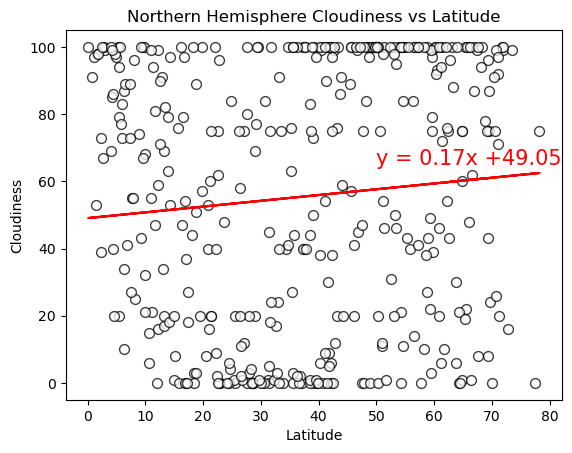

In [88]:
# Northern Hemisphere
nh_lat= northern_hemi_df['Lat']
nh_cloud= northern_hemi_df['Cloudiness']

#Calculate linear regression
plt.scatter(nh_lat, nh_cloud,s=50, c='white', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)


# Perform a linear regression on Northern hemisphere Latitude vs temperature 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nh_lat, nh_cloud)

# Get regression values
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(nh_lat, regress_values, 'r');
print(line_eq)

plt.plot(nh_lat,regress_values,"r-")

plt.annotate(line_eq,(50,65),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

y = 0.73x +79.84


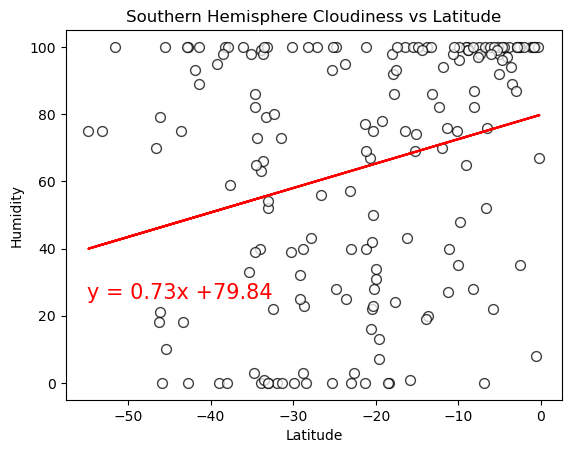

In [87]:
# Southern Hemisphere
# Build the scatter plots for humidity vs latitude in southern hemisphere 
sh_lat= southern_hemi_df['Lat']
sh_cloud= southern_hemi_df['Cloudiness']

#Calculate linear regression
plt.scatter(sh_lat, sh_cloud,s=50, c='white', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Perform a linear regression on Northern hemisphere Latitude vs humidity 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sh_lat,sh_cloud)

# Get regression values
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(sh_lat,regress_values,"r-")
print(line_eq)

#line annotation 

plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.plot(sh_lat, regress_values, 'r');

# Incorporate the other graph properties
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Both graphs indicate a positive correlation between cloudiness and latitude. However the slope being steeper in the southern
in the southern hemisphere shows a greater correlation for the southern hemisphere over the northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x +3.31


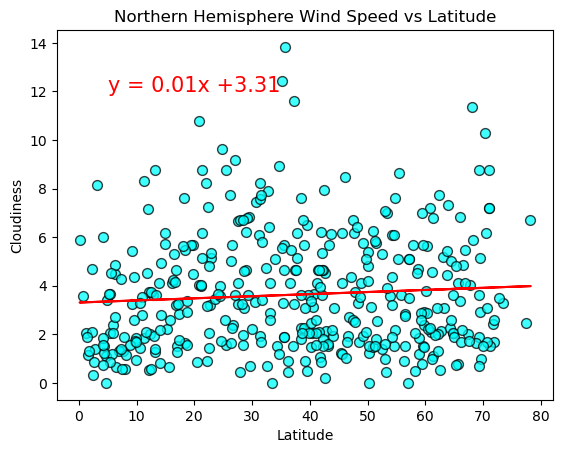

In [86]:
# Northern Hemisphere
nh_lat= northern_hemi_df['Lat']
nh_ws= northern_hemi_df['Wind Speed']

#Calculate linear regression
plt.scatter(nh_lat, nh_ws,s=50, c='cyan', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Perform a linear regression on Northern hemisphere Latitude vs humidity 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nh_lat,nh_ws)

# Get regression values
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(nh_lat,regress_values,"r-")
print(line_eq)

#line annotation 

plt.annotate(line_eq,(5,12),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

y = -0.04x +2.08


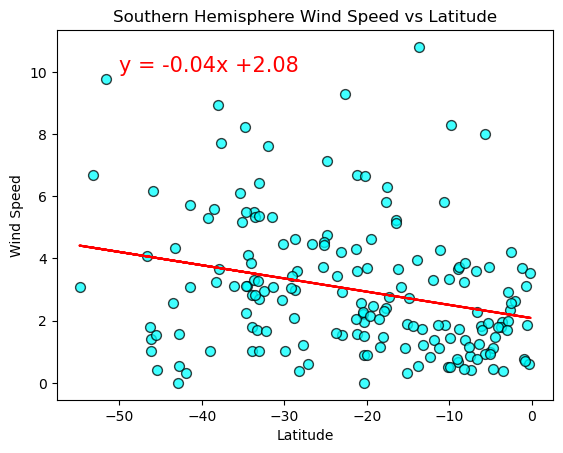

In [85]:
# Southern Hemisphere
# Build the scatter plots for humidity vs latitude in southern hemisphere 
sh_lat= southern_hemi_df['Lat']
sh_ws= southern_hemi_df['Wind Speed']

#Calculate linear regression

plt.scatter(sh_lat, sh_ws,s=50, c='cyan', marker ='o',edgecolor='black', linewidth=1, alpha =0.75)

# Perform a linear regression on Northern hemisphere Latitude vs humidity 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sh_lat,sh_ws)

# Get regression values
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(sh_lat,regress_values,"r-")
print(line_eq)

#line annotation 
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.plot(sh_lat, regress_values, 'r');

# Incorporate the other graph properties
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show plot
plt.show()

**Discussion about the linear relationship:** 

These graphs show different correlations between wind speed and latitude. The northern hemisphere shows only a very slight
positive relationship while the southern hemisphere shows a negative relationship. Wind speed is likely to be higher a lower
points of latitude and lower the closer to 0 the latitude gets. 